Importing required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset into object "BankData"
BankData = pd.read_csv("bank_data.csv")

Heatmap of Correlation among Variables(Features) of the dataset.

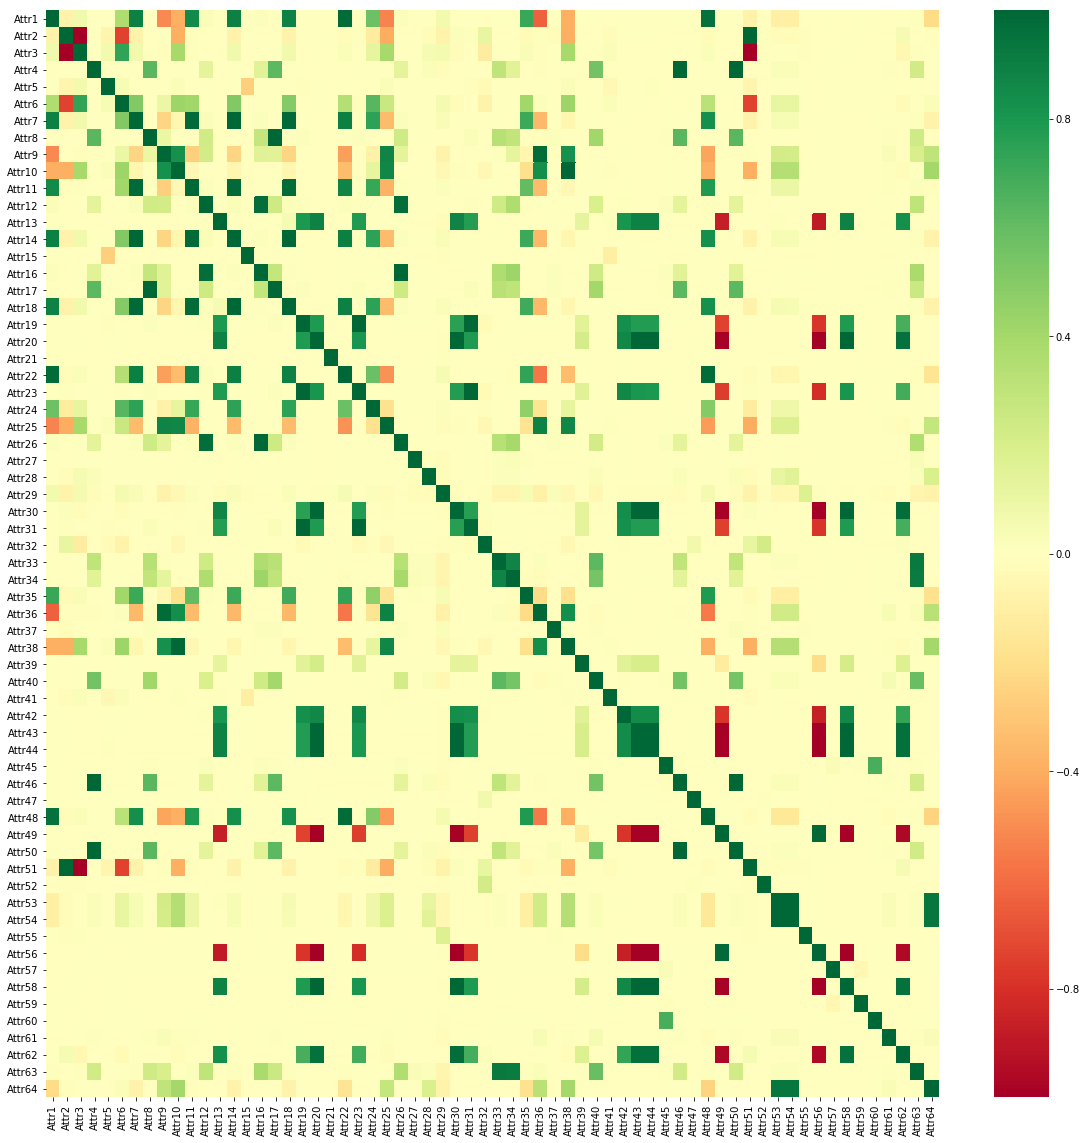

In [4]:
corr = BankData.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="RdYlGn")

Finding Correlation among Variables

In [5]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [6]:
#Outputs variables that has correlation less than 0.9


BankData=corr_df(BankData,0.9)

Attr11 | Attr7 | 0.99
Attr14 | Attr7 | 1.0
Attr14 | Attr11 | 0.99
Attr16 | Attr12 | 0.97
Attr17 | Attr8 | 1.0
Attr18 | Attr7 | 0.99
Attr18 | Attr11 | 0.98
Attr18 | Attr14 | 0.99
Attr22 | Attr1 | 0.98
Attr23 | Attr19 | 1.0
Attr26 | Attr12 | 0.97
Attr26 | Attr16 | 1.0
Attr30 | Attr20 | 0.99
Attr31 | Attr19 | 1.0
Attr31 | Attr23 | 0.99
Attr36 | Attr9 | 0.98
Attr38 | Attr10 | 1.0
Attr43 | Attr20 | 1.0
Attr43 | Attr30 | 0.99
Attr44 | Attr20 | 1.0
Attr44 | Attr30 | 0.99
Attr46 | Attr4 | 1.0
Attr48 | Attr1 | 0.96
Attr48 | Attr22 | 0.98
Attr49 | Attr20 | -0.99
Attr49 | Attr30 | -0.99
Attr49 | Attr43 | -0.99
Attr49 | Attr44 | -0.99
Attr50 | Attr4 | 1.0
Attr50 | Attr46 | 1.0
Attr51 | Attr2 | 1.0
Attr51 | Attr3 | -1.0
Attr56 | Attr20 | -1.0
Attr56 | Attr30 | -0.99
Attr56 | Attr43 | -1.0
Attr56 | Attr44 | -1.0
Attr56 | Attr49 | 0.99
Attr58 | Attr20 | 1.0
Attr58 | Attr30 | 0.99
Attr58 | Attr43 | 1.0
Attr58 | Attr44 | 1.0
Attr58 | Attr49 | -0.99
Attr58 | Attr56 | -1.0
Attr62 | Attr20 | 0.95
Attr62 |

In [7]:
#Dimensions of the dataset after reducing 

BankData.shape

(24996, 41)

In [8]:
#Data types of the dataset.

BankData.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr12    float64
Attr13    float64
Attr15    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr24    float64
Attr25    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr37    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr45    float64
Attr47    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr57    float64
Attr59    float64
Attr60    float64
Attr61    float64
target     object
dtype: object

In [9]:
# Dummification of the 'target'


BankData = pd.get_dummies(BankData,columns=["target"],drop_first=True)

In [10]:
BankData["Target"] = BankData["target_Yes"]

In [11]:
BankData.drop(["target_Yes"],axis=1,inplace=True)

In [12]:
BankData.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr12    float64
Attr13    float64
Attr15    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr24    float64
Attr25    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr37    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr45    float64
Attr47    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr57    float64
Attr59    float64
Attr60    float64
Attr61    float64
Target      uint8
dtype: object

In [13]:
# Count of 0 and 1 in the target variable.

pd.value_counts(BankData.Target)

0    20830
1     4166
Name: Target, dtype: int64

Plotting the frequency of "0s" and "1s"

Text(0,0.5,'Frequency')

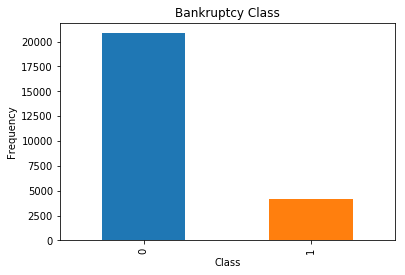

In [14]:
pd.value_counts(BankData['Target']).plot(kind = "bar")
plt.title("Bankruptcy Class")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [15]:
#Summary Statistics
BankData.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr47,Attr52,Attr53,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Target
count,24990.000000,24990.000000,24990.000000,24910.000000,2.495100e+04,24990.000000,24990.000000,24931.000000,24988.000000,24990.000000,...,24826.000000,24822.000000,24469.000000,24469.000000,2.499600e+04,24989.000000,24989.000000,2.322600e+04,24935.000000,24996.000000
mean,-0.025399,0.674995,0.048404,5.433537,-2.011619e+02,-0.121430,0.025566,8.587400,2.546445,0.617376,...,111.419087,4.442290,18.543571,19.477677,6.972576e+03,-0.106698,2.479371,3.959328e+02,17.266378,0.166667
std,4.834482,6.586872,6.573579,181.872588,2.929780e+04,8.790638,4.954985,297.912558,46.266459,16.707811,...,1965.015410,561.644677,738.143151,740.932599,7.213189e+04,12.346187,213.995088,2.517297e+04,687.213040,0.372685
min,-463.890000,-2.421800,-479.960000,-0.403110,-2.722100e+06,-508.410000,-463.890000,-141.410000,-3.496000,-479.910000,...,-64.176000,-25.467000,-1758.900000,-1033.700000,-1.805200e+06,-1236.300000,-284.380000,-1.244000e+01,-12.656000,0.000000
25%,0.000445,0.289430,0.000000,1.006500,-5.758000e+01,-0.002932,0.002026,0.364790,1.018775,0.257872,...,15.920000,0.133483,0.610450,0.901540,8.762750e-02,0.008628,0.000000,5.461375e+00,4.551100,0.000000
50%,0.044284,0.504040,0.174070,1.495850,-6.096100e+00,0.000000,0.053477,0.967690,1.210900,0.474620,...,38.857358,0.227530,1.141300,1.328700,8.757900e+02,0.117340,0.013621,9.613650e+00,6.680700,0.000000
75%,0.126060,0.726772,0.383167,2.688350,4.581100e+01,0.062831,0.146965,2.460100,2.043200,0.688520,...,71.360000,0.371930,2.106600,2.257600,4.583973e+03,0.285450,0.293780,2.020900e+01,10.371000,0.000000
max,94.280000,480.960000,22.769000,27146.000000,1.250100e+06,303.670000,186.430000,29636.000000,3876.100000,1027.200000,...,166260.000000,88433.000000,86795.000000,87092.000000,4.398400e+06,147.190000,23853.000000,3.660200e+06,108000.000000,1.000000


In [16]:
# Percentage of missing values in the attributes.


print(BankData.isna().sum()/len(BankData))

Attr1     0.000240
Attr2     0.000240
Attr3     0.000240
Attr4     0.003441
Attr5     0.001800
Attr6     0.000240
Attr7     0.000240
Attr8     0.002600
Attr9     0.000320
Attr10    0.000240
Attr12    0.003441
Attr13    0.003321
Attr15    0.001120
Attr19    0.003361
Attr20    0.003321
Attr21    0.216075
Attr24    0.020043
Attr25    0.000240
Attr27    0.109097
Attr28    0.021083
Attr29    0.000240
Attr32    0.008761
Attr33    0.003441
Attr34    0.002600
Attr35    0.000240
Attr37    0.458793
Attr39    0.003321
Attr40    0.003441
Attr41    0.014682
Attr42    0.003321
Attr45    0.070811
Attr47    0.006801
Attr52    0.006961
Attr53    0.021083
Attr54    0.021083
Attr55    0.000000
Attr57    0.000280
Attr59    0.000280
Attr60    0.070811
Attr61    0.002440
Target    0.000000
dtype: float64


In [17]:
#Dropping the coloumns with NA percentage greater than 20%.


BankData.drop(["Attr37","Attr21"],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [19]:
Y = BankData["Target"]

In [20]:
X = BankData.drop(["Target"],axis=1)

In [21]:
X.columns 

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr19', 'Attr20',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr45',
       'Attr47', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr57', 'Attr59',
       'Attr60', 'Attr61'],
      dtype='object')

Imputing missing values in the dataset.

In [22]:
from sklearn.preprocessing import Imputer

In [23]:
imp1 = Imputer(missing_values='NaN',axis=1,strategy='mean')

In [24]:
imp1.fit(X)

Imputer(axis=1, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [25]:
X = pd.DataFrame(imp1.transform(X),columns=['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr19', 'Attr20',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr45',
       'Attr47', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr57', 'Attr59',
       'Attr60', 'Attr61'])

In [26]:
X.shape

(24996, 38)

In [27]:
type(X)

pandas.core.frame.DataFrame

Balancing the target variables using "SMOTE"

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smt = SMOTE(n_jobs=-1,random_state=8)

In [30]:
X_res,y_res = smt.fit_sample(X,Y)

In [31]:
pd.value_counts(y_res)

1    20830
0    20830
dtype: int64

Splitting the data in Test and Train.

In [32]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.30, random_state=8)

Standardising the datasets(Test and Train)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
Scaler = StandardScaler()

In [35]:
Scaler.fit(X_train_res)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
X_train_res = pd.DataFrame(Scaler.transform(X_train_res),columns=['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr19', 'Attr20',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr45',
       'Attr47', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr57', 'Attr59',
       'Attr60', 'Attr61'])

In [37]:
X_test_res = pd.DataFrame(Scaler.transform(X_test_res),columns=['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr12', 'Attr13', 'Attr15', 'Attr19', 'Attr20',
       'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr32', 'Attr33',
       'Attr34', 'Attr35', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr45',
       'Attr47', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr57', 'Attr59',
       'Attr60', 'Attr61'])

MODEL BUILDING 


1. LOGISTIC REGRESSION 

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LR = LogisticRegression()

In [40]:
param_grid = {'penalty':['l1','l2'],
             'C':[1,2,3,4,5]}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
LR_cv = GridSearchCV(LR,param_grid,cv=5,n_jobs=-1,verbose=1)

In [43]:
%time LR_cv.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.6min finished


Wall time: 28min 37s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [44]:
print(LR_cv.best_params_,LR_cv.best_score_)

{'C': 5, 'penalty': 'l2'} 0.6525615527055757


In [45]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [46]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH


LR_best = LR_cv.best_estimator_

In [47]:
LR_pred_train = LR_best.predict(X_train_res)

In [48]:
#Classification Metric for Logistic Regression on Training dataset


print(classification_report(y_train_res,LR_pred_train))

             precision    recall  f1-score   support

          0       0.67      0.63      0.65     14657
          1       0.65      0.68      0.67     14505

avg / total       0.66      0.66      0.66     29162



In [49]:
LR_pred_test = LR_best.predict(X_test_res)

In [50]:
#Classification metric for Logistic Regression on Test dataset


print(classification_report(y_test_res,LR_pred_test))

             precision    recall  f1-score   support

          0       0.66      0.63      0.64      6173
          1       0.65      0.68      0.67      6325

avg / total       0.66      0.66      0.66     12498



In [51]:
from sklearn import metrics

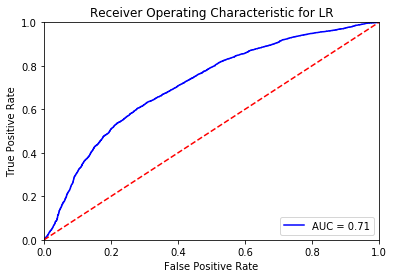

In [52]:
probs = LR_best.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2. DECISION TREE CLASSIFIER

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DTC = DecisionTreeClassifier()

In [55]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
 'max_features': ['auto', 'sqrt','log2'],}

In [56]:
DTC_cv = GridSearchCV(DTC,param_grid,cv=5,n_jobs=-1,verbose=1)

In [57]:
%time DTC_cv.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.5s finished


Wall time: 9.04 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [58]:
print(DTC_cv.best_params_,DTC_cv.best_score_)

{'max_depth': 50, 'max_features': 'sqrt'} 0.8816953569714011


In [59]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH


DTC_best = DTC_cv.best_estimator_

In [60]:
DTC_pred_test = DTC_best.predict(X_test_res)

In [61]:
DTC_pred_train = DTC_best.predict(X_train_res)

In [62]:
from sklearn import metrics

In [63]:
#Classification metric for Decision Tree on Training dataset


print(classification_report(y_train_res,DTC_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14657
          1       1.00      1.00      1.00     14505

avg / total       1.00      1.00      1.00     29162



In [64]:
#Classification metric for Decision Tree on Test dataset


print(classification_report(y_test_res, DTC_pred_test))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88      6173
          1       0.89      0.89      0.89      6325

avg / total       0.89      0.89      0.89     12498



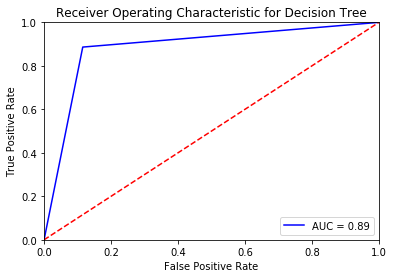

In [65]:
probs = DTC_cv.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from sklearn.metrics import classification_report

3. RANDOM FOREST CLASSIFIER (BAGGED TREES)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
Rfc = RandomForestClassifier(n_jobs=-1)

In [69]:
param_grid = {
 'max_depth': [10, 20, 30, 40, 50,],
 'max_features': ['auto', 'sqrt','log2'],
 'n_estimators': [100,150,200,250,300]}

In [70]:
rfc_cv = GridSearchCV(Rfc,param_grid,cv=5,n_jobs=-1,verbose=1)

In [71]:
%time rfc_cv.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 29.0min finished


Wall time: 29min 8s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [72]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH

rfc_best = rfc_cv.best_estimator_

In [73]:
from sklearn import metrics

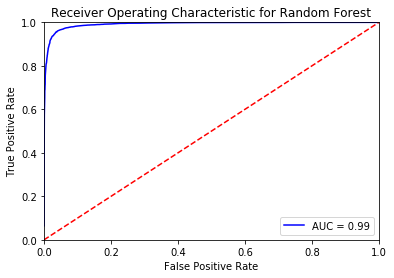

In [74]:
probs = rfc_best.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
rfc_pred_train = rfc_best.predict(X_train_res)

In [76]:
#Classification metric for Random Forest Classifier on Training dataset


print(classification_report(y_train_res,rfc_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14657
          1       1.00      1.00      1.00     14505

avg / total       1.00      1.00      1.00     29162



In [77]:
rfc_pred_test = rfc_best.predict(X_test_res)

In [78]:
#Classification metric for Random Forest Classifier on Test dataset

print(classification_report(y_test_res,rfc_pred_test))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      6173
          1       0.96      0.96      0.96      6325

avg / total       0.96      0.96      0.96     12498



4. KNN CLASSIFIER 

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
KNN = KNeighborsClassifier(n_jobs=-1)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
param_grid = {"n_neighbors":[5,7,10,13,15],
             "p":[1,2]}

In [83]:
KNN_cv = GridSearchCV(KNN,param_grid,cv=5,n_jobs=-1,verbose = 1)

In [84]:
%time KNN_cv.fit(X_train_res,y_train_res) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min


Wall time: 6min 24s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 7, 10, 13, 15], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [85]:
print(KNN_cv.best_params_,KNN_cv.best_score_) 

{'n_neighbors': 5, 'p': 1} 0.8745627871888073


In [86]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH

KNN_best = KNN_cv.best_estimator_

In [87]:
KNN_pred_train = KNN_best.predict(X_train_res)

In [88]:
#Classification metric for K Nearest Neigbours on Training dataset 

print(classification_report(y_train_res,KNN_pred_train))

             precision    recall  f1-score   support

          0       0.96      0.89      0.93     14657
          1       0.90      0.96      0.93     14505

avg / total       0.93      0.93      0.93     29162



In [89]:
%time KNN_pred_test = KNN_best.predict(X_test_res)

Wall time: 2.61 s


In [90]:
#Classification metric for K Nearest Neigbours on Test dataset

print(classification_report(y_test_res,KNN_pred_test))

             precision    recall  f1-score   support

          0       0.92      0.83      0.87      6173
          1       0.85      0.93      0.89      6325

avg / total       0.88      0.88      0.88     12498



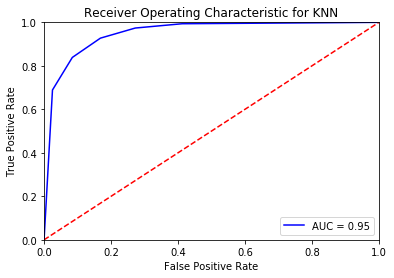

In [91]:
probs = KNN_best.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

5. ADABOOSTER CLASSIFIER 

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ADA = AdaBoostClassifier()

In [94]:
param_grid = param_grid = {'n_estimators' : [100, 150, 200, 250, 300],
              'learning_rate' : [0.1, 0.5, 0.9, 1]}

In [95]:
ADA_cv = GridSearchCV(ADA,param_grid,n_jobs=-1,verbose = 1)

In [96]:
%time ADA_cv.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.5min finished


Wall time: 6min 1s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300], 'learning_rate': [0.1, 0.5, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [97]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH


ADA_best = ADA_cv.best_estimator_

In [98]:
print(ADA_cv.best_params_,ADA_cv.best_score_)

{'learning_rate': 1, 'n_estimators': 300} 0.8913654756189562


In [99]:
ADA_pred_train = ADA_best.predict(X_train_res)

In [100]:
#Classification metric for ADA Boosting on Training dataset

print(classification_report(y_train_res,ADA_pred_train))

             precision    recall  f1-score   support

          0       0.90      0.91      0.91     14657
          1       0.91      0.90      0.90     14505

avg / total       0.90      0.90      0.90     29162



In [101]:
ADA_pred_test = ADA_best.predict(X_test_res)

In [102]:
#Classification metric for ADA Boosting on Test dataset

print(classification_report(y_test_res,ADA_pred_test))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90      6173
          1       0.90      0.89      0.90      6325

avg / total       0.90      0.90      0.90     12498



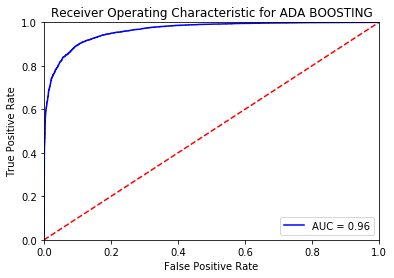

In [103]:
probs = ADA_best.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for ADA BOOSTING')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

6. GRADIENT BOOSTING CLASSIFIER

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
Gbc = GradientBoostingClassifier(subsample=0.8)

In [106]:
param_grid = {"loss":['deviance', 'exponential'],
              "n_estimators" : [100,150,200,250],
              "max_depth" : [5, 10],
              "learning_rate" : [0.1,0.5,0.9,1]}
              

In [107]:
Gbc_cv = GridSearchCV(Gbc,param_grid,cv = 5,n_jobs=-1,verbose = 1)

In [108]:
%time Gbc_cv.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 77.9min finished


Wall time: 1h 18min 49s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance', 'exponential'], 'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [109]:
#SELECTING BEST MODEL WITH OPTIMIZED PARAMETERS AFTER GRID SEARCH 

Gbc_best = Gbc_cv.best_estimator_

In [110]:
print(Gbc_cv.best_params_,Gbc_cv.best_score_)

{'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 10, 'n_estimators': 200} 0.9646800630958097


In [111]:
Gbc_pred_train = Gbc_best.predict(X_train_res)

In [112]:
#Classification metric for Gradient Boosting on Training dataset

print(classification_report(y_train_res,Gbc_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14657
          1       1.00      1.00      1.00     14505

avg / total       1.00      1.00      1.00     29162



In [113]:
Gbc_pred_test = Gbc_best.predict(X_test_res)

In [114]:
#Classification metric for Gradient Boosting on Test dataset

print(classification_report(y_test_res,Gbc_pred_test))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      6173
          1       0.97      0.97      0.97      6325

avg / total       0.97      0.97      0.97     12498



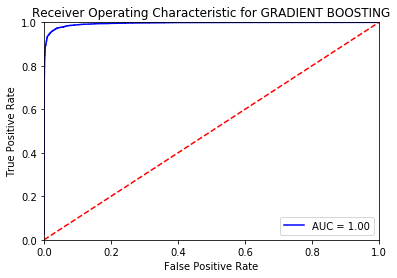

In [115]:
probs = Gbc_best.predict_proba(X_test_res)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_res, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for GRADIENT BOOSTING')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

STACKING - using MODE

In [116]:
stack = np.array([LR_pred_test,DTC_pred_test,rfc_pred_test,KNN_pred_test,ADA_pred_test,Gbc_pred_test]).T

In [117]:
from scipy.stats import mode

In [118]:
stack_pred = mode(stack,axis=1)[0]

In [119]:
#Classification metric for STACKING on Test dataset


print(classification_report(y_test_res,stack_pred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95      6173
          1       0.96      0.95      0.95      6325

avg / total       0.95      0.95      0.95     12498



ACCURACIES OF MODELS

In [120]:
from sklearn.metrics import accuracy_score

In [124]:
print("The accuracy for Logistic regression model : ", accuracy_score(y_test_res,LR_pred_test))
print("The accuracy for Decision Tree model :", accuracy_score(y_test_res,DTC_pred_test))
print("The accuracy for Random Forest Classifier model :", accuracy_score(y_test_res,rfc_pred_test))
print("The accuracy for K Nearest Neighbours model :", accuracy_score(y_test_res,KNN_pred_test))
print("The accuracy for ADA Boosting model :",accuracy_score(y_test_res,ADA_pred_test))
print("The accuracy for Gradient Boosting model :", accuracy_score(y_test_res,Gbc_pred_test))



print("The accuracy for STACKING method :", accuracy_score(y_test_res,stack_pred))

The accuracy for Logistic regression model :  0.6558649383901424
The accuracy for Decision Tree model : 0.8854216674667947
The accuracy for Random Forest Classifier model : 0.9600736117778844
The accuracy for K Nearest Neighbours model : 0.8801408225316051
The accuracy for ADA Boosting model : 0.8978236517842855
The accuracy for Gradient Boosting model : 0.9671147383581373
The accuracy for STACKING method : 0.9546327412385982
